In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.model_selection import KFold

df = pd.read_csv("data.csv")

X_vals = df.iloc[:,0:5]
y_vals = df.iloc[:,-1]

# Normalization
scaler = StandardScaler()
X_vals = scaler.fit_transform(X_vals)

X_train,X_test,y_train,y_test = train_test_split(X_vals,y_vals,test_size=0.3,random_state = 10)

In [4]:
models =[]

models.append(("LinearRegression",LinearRegression()))
models.append(("Ridge Regression ",Ridge()))
models.append(("Lasso Regression",Lasso()))
models.append(("RadomForest",RandomForestRegressor()))
models.append(("GradientBoosting",GradientBoostingRegressor()))


model_name = []
mae = []
mse = []
rmse = []
r2score = []
explained_variance = []

Model : LinearRegression
Mean Absolute Error: 4.046440700829948
Mean Squared Error: 29.80310588231704
Root Mean Squared Error: 5.459222094979928
R2 Score: -1.3916590296562927
Explained Variance Score: 0.2881319054461223
1
*******************************************************************
Model : Ridge Regression 
Mean Absolute Error: 4.045907800668186
Mean Squared Error: 29.80263556385776
Root Mean Squared Error: 5.4591790192168785
R2 Score: -1.3947666597701893
Explained Variance Score: 0.2881423627823385
2
*******************************************************************
Model : Lasso Regression
Mean Absolute Error: 3.9271685183379086
Mean Squared Error: 31.02961369952779
Root Mean Squared Error: 5.570423116741473
R2 Score: -4.479193570986021
Explained Variance Score: 0.2586998013644194
3
*******************************************************************
Model : RadomForest
Mean Absolute Error: 0.15629629629629627
Mean Squared Error: 0.4833291666666663
Root Mean Squared Error: 0.6

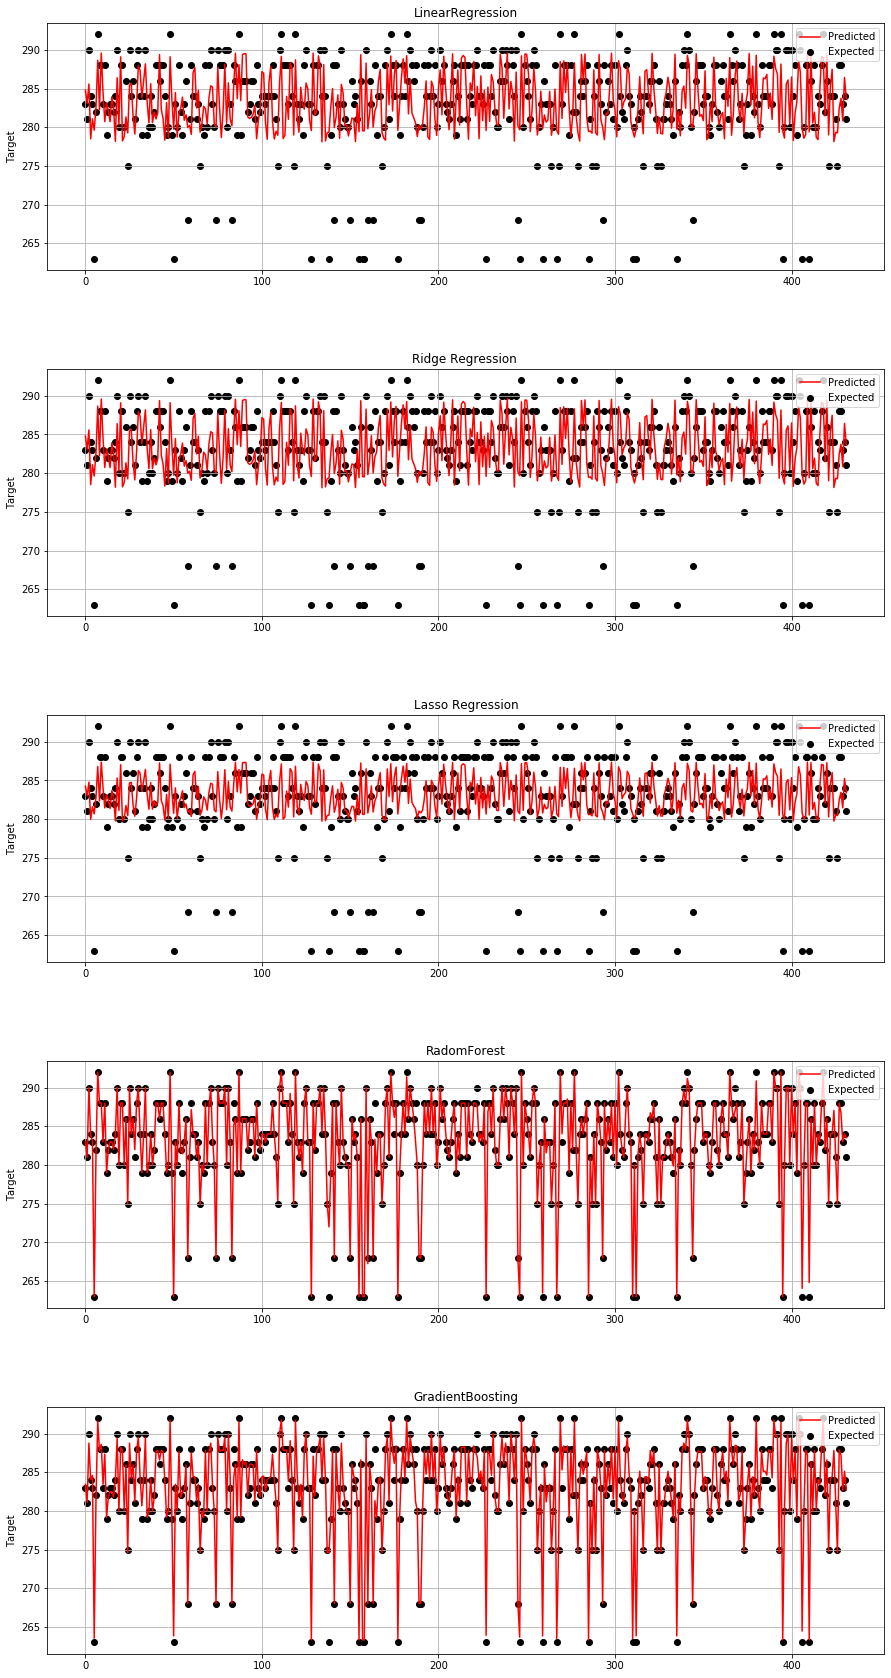

In [5]:
i =0

fig = plt.figure(figsize=(15,30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for name,model in models:
    i=i+1
    print("Model :",name)
    model_name.append(name)
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    mae.append(mean_absolute_error(y_test, y_pred))
    
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 
    mse.append(mean_squared_error(y_test, y_pred))
    
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
    rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print("R2 Score:",r2_score(y_pred,y_test))  # Near 1 is good
    r2score.append(r2_score(y_pred,y_test))
    
    print("Explained Variance Score:",explained_variance_score(y_test,y_pred)) # Near 1 is Good
    explained_variance.append(explained_variance_score(y_test,y_pred))
    
    print(i)
    
    ax = fig.add_subplot(5, 1, i)
    ax.title.set_text(name)
    ax.scatter(range(len(y_test)),y_test,c='black',Label="Expected")
    ax.plot(range(len(y_test)),y_pred,c='r',Label= "Predicted")
    ax.set_ylabel('Target')
    ax.legend(loc='upper right')
    ax.grid()

    print("*******************************************************************")
    
dict = {"MSE": mse,"MAE":mae,"RMSE":rmse,"R2Score":r2score,"Explained Variance Score":explained_variance}